# **PCA**







#Step 1 : import libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix,auc,roc_curve,RocCurveDisplay

#from google.colab import files
#uploaded = files.upload()


#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [84]:
wine = load_wine(as_frame=True)
df = wine.frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [85]:
print('Original Dataframe shape :',wine.data.shape)


Original Dataframe shape : (178, 13)


In [86]:
X = df.drop('target', axis=1)
print('Inputs Dataframe shape  : ', X.shape)
#X = df[wine['feature_names']]
#print('Inputs Dataframe shape  : ', X.shape)

Inputs Dataframe shape  :  (178, 13)


In [87]:
y = df['target']
print('Target Dataframe shape  : ', y.shape)

Target Dataframe shape  :  (178,)


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [89]:
X_mean = X.mean()
X_std = X.std()
Z = (X-X_mean)/X_std
Z.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [90]:
c = Z.corr()
c

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


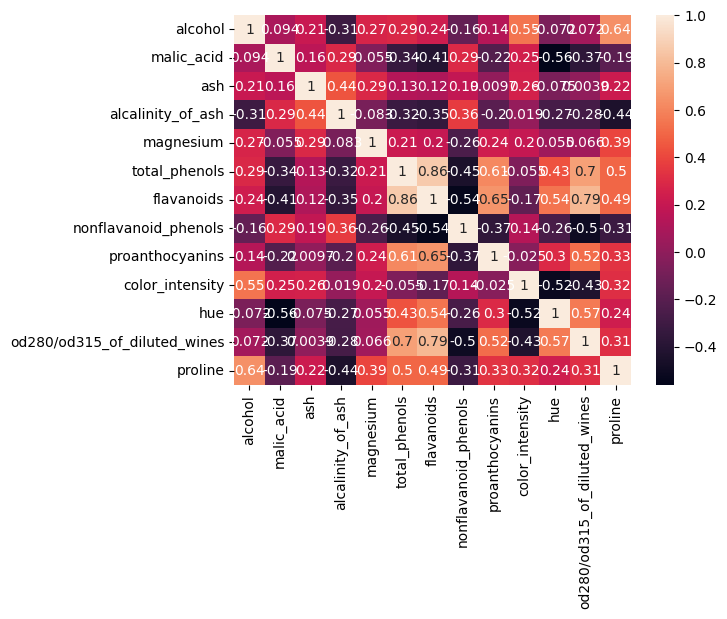

In [91]:
sns.heatmap(c,annot=True)
plt.show()

In [92]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print(' Eigen vakues:\n', eigenvalues)
print(' Eigen vectors:\n', eigenvectors)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

 Eigen vakues:
 [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.10337794 0.34849736 0.16877023 0.28887994 0.22578864
 0.25090248]
 Eigen vectors:
 [[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865
  -0.05639636  0.01496997 -0.39613926  0.26628645  0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385
   0.42052391  0.02596375 -0.06582674 -0.12169604 -0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466
  -0.14917061 -0.14121803  0.17026002  0.04962237 -0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451
  -0.28696914  0.09168285 -0.42797018  0.05574287  0.20044931  0.47931378
   0.05279942]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394
   0.3228833   0.05677422  0.15636143 -0.06222011  0.27140257  0.07128891
   0.06787022]
 [-0.

In [93]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
print(' Eigen vakues:\n', eigenvalues)
print(' Eigen vectors:\n', eigenvectors)

 Eigen vakues:
 [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
 Eigen vectors:
 [[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865
  -0.05639636 -0.39613926  0.50861912  0.21160473 -0.22591696  0.26628645
   0.01496997]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385
   0.42052391 -0.06582674 -0.07528304 -0.30907994  0.07648554 -0.12169604
   0.02596375]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466
  -0.14917061  0.17026002 -0.30769445 -0.02712539 -0.49869142  0.04962237
  -0.14121803]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451
  -0.28696914 -0.42797018  0.20044931  0.05279942  0.47931378  0.05574287
   0.09168285]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394
   0.3228833   0.15636143  0.27140257  0.06787022  0.07128891 -0.06222011
   0.05677422]
 [-0.

In [94]:
explained_var = np.cumsum(eigenvalues)/np.sum(eigenvalues)
explained_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [95]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

In [96]:
Z_pca = Z @ PCA_components
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1 ,inplace = True)
print(Z_pca)

         PCA1      PCA2
0   -3.307421 -1.439402
1   -2.203250  0.332455
2   -2.509661 -1.028251
3   -3.746497 -2.748618
4   -1.006070 -0.867384
..        ...       ...
173  3.361043 -2.210055
174  2.594637 -1.752286
175  2.670307 -2.753133
176  2.380303 -2.290884
177  3.199732 -2.761131

[178 rows x 2 columns]


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [97]:
u = eigenvectors[:,:n_components]
PCA_components = pd.DataFrame(u, index = wine['feature_names'], columns = ['PC1','PC2'])
PCA_components

,PC1,PC2
alcohol,-0.144329,-0.483652
malic_acid,0.245188,-0.224931
ash,0.002051,-0.316069
alcalinity_of_ash,0.239320,0.010591
magnesium,-0.141992,-0.299634
total_phenols,-0.394661,-0.065040
flavanoids,-0.422934,0.003360
nonflavanoid_phenols,0.298533,-0.028779
proanthocyanins,-0.313429,-0.039302
color_intensity,0.088617,-0.529996


In [73]:
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)


          PC1       PC2
0    3.307421 -1.439402
1    2.203250  0.332455
2    2.509661 -1.028251
3    3.746497 -2.748618
4    1.006070 -0.867384
..        ...       ...
173 -3.361043 -2.210055
174 -2.594637 -1.752286
175 -2.670307 -2.753133
176 -2.380303 -2.290884
177 -3.199732 -2.761131

[178 rows x 2 columns]


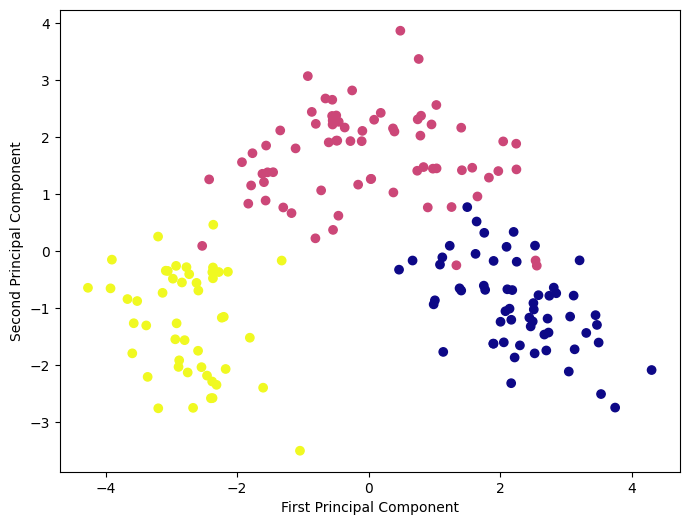

In [98]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=wine['target'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [99]:
pca.components_


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

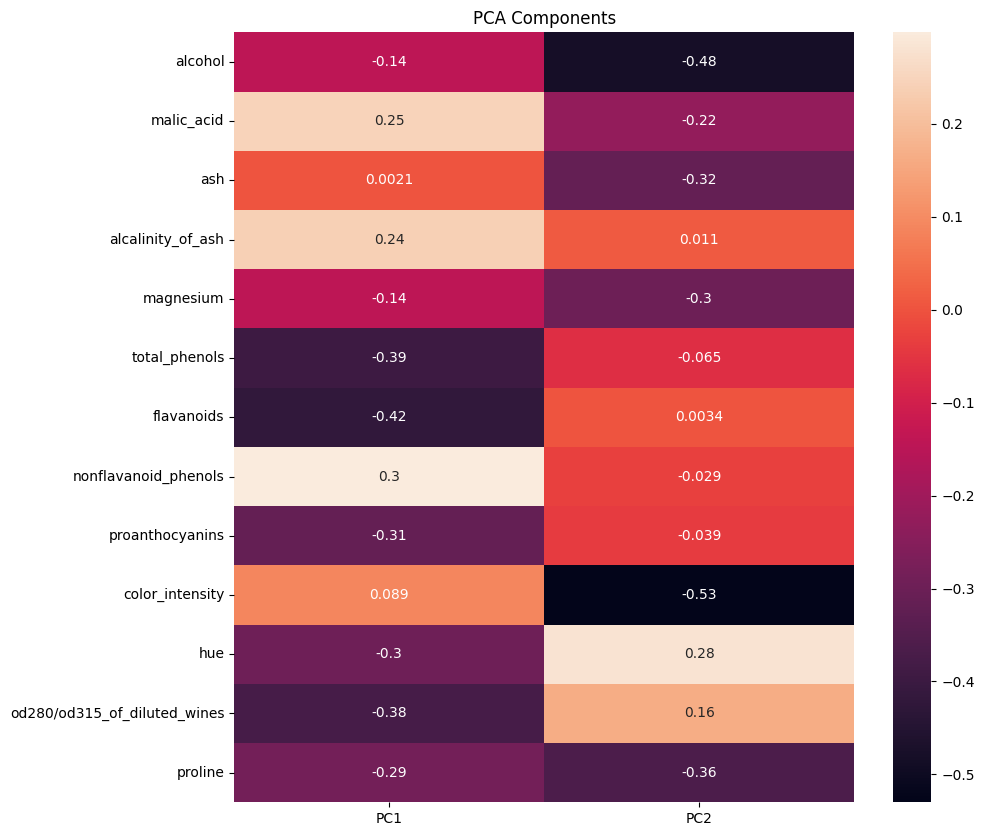

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(PCA_components, annot=True)
plt.title('PCA Components')
plt.show()

#Step 6: Fitting Logistic Regression To the training set




In [101]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Step 7: Predicting the test set result




In [102]:
pred = lr.predict(X_test)
print(pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0]


#Step 8: Making the confusion matrix




In [103]:
confusion_matrix(y_test, pred)

array([[13,  1,  0],
       [ 1, 14,  1],
       [ 0,  0,  6]])

#Step 9: Predicting the training set result




In [104]:
lr.predict(X_train)

array([2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 2])

#Step 10: Visualizing the Test set results




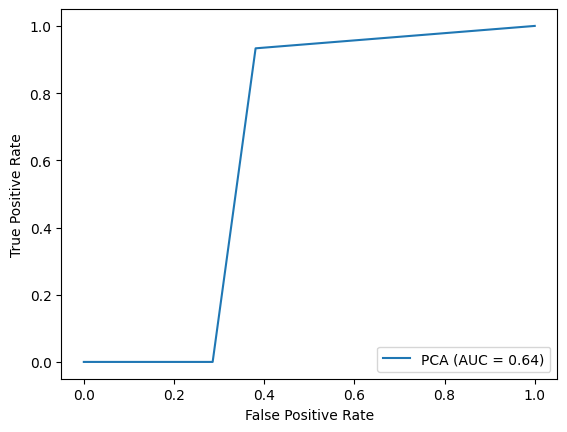

In [105]:
fpr, tpr, thresholds = roc_curve(pred,y_test,pos_label=1)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='PCA')
display.plot()

#**Well Done :)**
Now let's practice!